In [1]:
import cvxpy as cvx
import numpy as np
import matplotlib.pyplot as plt

# Using CVXPY

First, the hypothesis function:

In [2]:
def H(x,w):
    
    '''
    given a value to w, and a numpy array to x, this function will return the logistic function result 
    
    W = theta
    X = feature input, numpy array
    H = len(X)-dim array
    '''
    
    return 1/(1.0 + np.exp(-1.0 * np.dot(x.reshape(-1,1), w)))

Define some points:

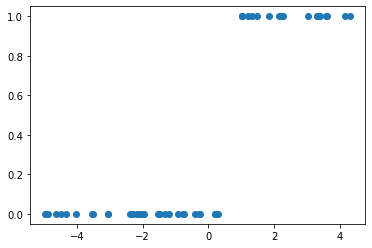

In [3]:
X = (np.random.random((1, 50)) - 0.5)*10; X = X[0]
Y = np.array([int(0) if x < 0.5 else int(1) for x in X])

plt.scatter(X, Y)

The problem to be solved is the maximization of the likelihood:

In [4]:
w = cvx.Variable()

obj = cvx.Maximize(np.dot(Y, X)*w - cvx.sum(cvx.logistic(X*w)))
prob = cvx.Problem(obj).solve()

w = w.value

The best w:

In [5]:
w

array(3.65812423)

As we are dealing with one-dimensional features, our decision boundary is the point w*x = 0:

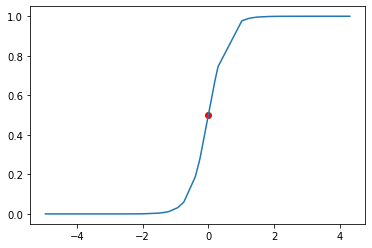

In [6]:
plt.scatter(0, H(np.array([0]), w), color='red')
plt.plot(sorted(X), sorted(H(X, w)))

# From scratch

Define the gradient and the gradient descent functions:

In [7]:
def gradient(w, h, x, y):
    
    '''
    given the array w, a value h, the features x and the expected output y, this function will return the partial derivative of
    the likelihood function
    
    w        = array
    h        = float
    x        = array
    y        = array
    gradient = generator
    '''
    
    return sum(-X[i]*(y[i] - h(X[i],w)) for i in range(len(x)))

def GD(eta, iterations, grad, x, y, d):
    
    '''
    given a learning rate eta, a number of iterations iterations, the features x, the expected output y and the features dimension d, this function
    will get the best w to maximize the hypothesis
    
    eta        = float
    iterations = int
    grad       = function
    x          = features array
    y          = expected outputs array
    d          = features dimension
    GD         = array
    '''
    
    w = np.zeros(d)
    for i in range(1, iterations + 1):
        gradient = grad(w, H, x, y)
        w = w - np.dot(eta, gradient)
        if i % 100 == 0:
            print('iteration {}, w:{}'.format(i, w))
    print('Optimal w: {}'.format(w))
    return w

In [8]:
w = GD(0.3, 300, gradient, X, Y, 1)

iteration 100, w:[3.75403788]
iteration 200, w:[3.65812476]
iteration 300, w:[3.65812376]
Optimal w: [3.65812376]


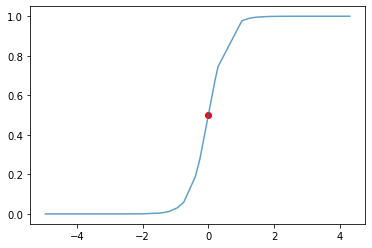

In [9]:
plt.scatter(0, H(np.array([0]), w), color='red')
plt.plot(sorted(X), sorted(H(X, w)), alpha=0.7)

# In SKLearn:

In [10]:
from sklearn.linear_model import LogisticRegression

In [11]:
clf = LogisticRegression(random_state=0).fit(X.reshape(50, 1), Y)

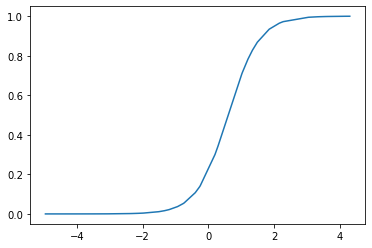

In [12]:
plt.plot(sorted(X), sorted([value[1] for value in clf.predict_proba(X.reshape(-1, 1))]))